# 도커 명령어

- 도커 엔진 및 명령 프롬프트 실행
- docker version 입력

## 성공 결과

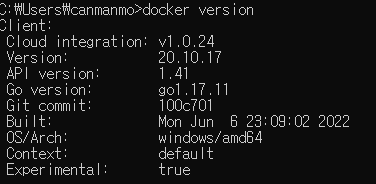

## 관련 커맨드

**docker container 하위_커맨드 옵션**
- start, stop, create, run, rm, exec, ls, cp, commit

**docker image 하위_커맨드 옵션**
- pull, rm, ls, build

**docker volum 하위_커맨드 옵션**
- create, inspect, ls, prune, rm 

**docker network 하위_커맨드 옵션**
- connect, disconnect, create, inspect, ls, prune, rm

# 컨테이너 생성, 삭제, 실행, 정지

- docker run (docker container run)
  - 도커 허브에서 이미지 내려받고 컨테이너 생성하고 실행하는 기능을 한꺼번에 수행 
  - docker image pull, docker container create, docker container start 기능 하나로 합친 것 
  - 자주 쓰이는 커맨드 : docker run (옵션) 이미지 (인자) 
  
- docker stop (docker container stop)
  - 컨테이너 삭제 전 정지시킴
  - 자주 쓰이는 커맨드 : docker stop 컨테이너_이름 
  
- docker rm (docker container rm)
  - 컨테이너 삭제 커맨드
  - 자주 쓰이는 커맨드 : docker rm 컨테이너_이름
  
- docker ps (docker container ls)
  - 컨테이너 목록 출력 
  - docker ps -a 옵션 추가하면 현재 존재하는 컨테이너(정지 상태 컨테이너 포하) 목록 출력 
  - docker ps (옵션)
  - 커맨드의 정식 명칭은 ls이지만 생략형이 ps

In [ ]:
# 아파치 컨테이너 생성 및 실행 
# --nmae apa000ex1 이름으로 컨테이너 생성
# -d 백그라운드 실행
# httpd 아파치의 이미지 이름 
docker run --name apa000ex1 -d httpd

# 실행 중인 컨테이너의 목록 확인
docker ps

# 모든 컨테이너의 목록 확인
docker ps -a

# 컨테이너 종료
docker stop apa000ex1

# 컨테이너 삭제
docker rm apa000ex1

## 성공 결과

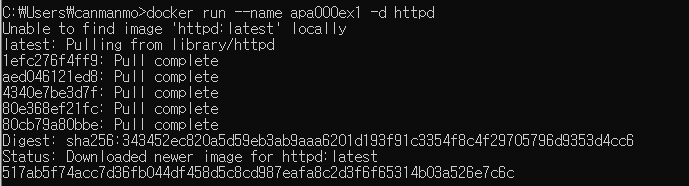

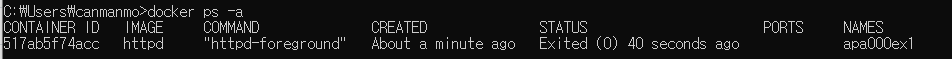

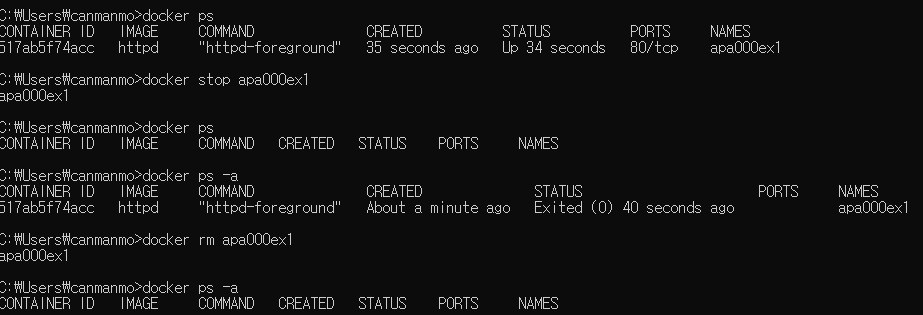

# 컨테이너 통신

- 웹 브라우저 통해 컨테이너 접근
- 웹 브라우저를 통해 컨테이너에 접근하려면 외부와 접속하기 위한 설정 필요. 이를 위해 포트 설정
- 포트 : 통신 내용이 드나드는 통로 의미. 웹은 포트 80번, 메일은 포트 25번 등 
- 아파치는 서버에서 정해둔 포트(80)에서 웹 사이트에 대한 접근을 기다리다가 사용자가 이 포트를 통해 접근해 오면 요청에 따라 웹 사이트의 페이지 제공
- 컨테이너 속에서 실행 중인 아파치는 외부와 직접 연결되지 않았기 때문에 외부에서 접근할 수 없음 
- 컨테이너를 실행 중인 물리적 컴퓨터가 외부의 접근을 대신 받아 전달 
- 컨테이너를 실행 중인 컴퓨터(호스트)의 8080번 포트와 컨테이너의 80번 포트를 연결 

**포트 설정 방법**
- -p 호스트_포트_번호:컨테이너_포트_번호
- -p 8080:80
- 여러 개의 웹 서버를 함께 실행할 수도 있음
- 호스트 포트 번호를 모두 같은 것으로 사용하면 어떤 컨테이너로 가야 할 요청인지 구분할 수 없음 
- 컨테이너 A에는 호스트 포트 8080. 컨테이너 B에는 호스트 포트 8081과 같은 식으로 겹치지 않게 설정 

**포트 접근 방법**
- http://localhost:8080/

In [ ]:
# 아파치 컨테이너 생성 및 실행 
# --nmae apa000ex2 이름으로 컨테이너 생성
# -d 백그라운드 실행
# httpd 아파치의 이미지 이름 
# 8080:80 호스트의 포트 8080을 컨테이너 포트 80으로 포워딩 
docker run --name apa000ex2 -d -p 8080:80 httpd
    
# 실행 중인 컨테이너의 목록 확인
docker ps

# 웹 브라우저를 통해 아파치에 접근할 수 있는지 확인 
http://localhost:8080/

# 컨테이너 종료
docker stop apa000ex2

# 컨테이너 삭제
docker rm apa000ex2

# 컨테이너 삭제 확인
docker ps -a

## 성공 결과

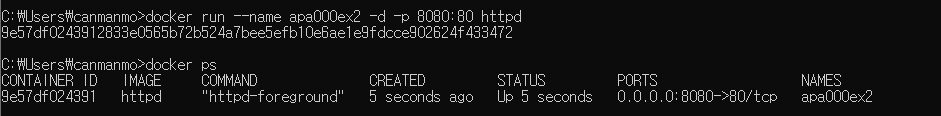

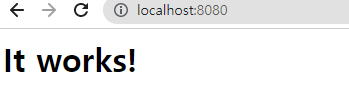

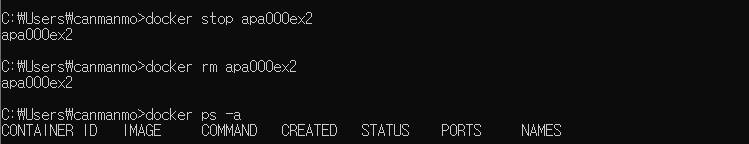

# 컨테이너 생성 익숙

**다양한 유형의 컨테이너**
- 리눅스 운영체제가 담긴 컨테이너 : ubuntu, centos, debian, fedora 등
- 웹 서버/데이터베이스 서버용 컨테이너 : httpd(Apache), nginx, mysql, postgres, mariadb
- 프로그램 실행을 위한 런타임과 그 외 소프트웨어 : openjdk(자파 런타임), python(파이썬 런타임)

**컨테이너 여러 개 실행**
- 호스트 컴퓨터의 포트 번호 중복돼서는 안 됨
- 컨테이너 포트는 중복돼도 무방

In [ ]:
# 아파치 컨테이너 생성 및 실행 
# --nmae apa000ex3 이름으로 컨테이너 생성
# -d 백그라운드 실행
# httpd 아파치의 이미지 이름 
# 8081:80 호스트의 포트 8081을 컨테이너 포트 80으로 포워딩 
docker run --name apa000ex3 -d -p 8081:80 httpd
docker run --name apa000ex4 -d -p 8082:80 httpd
docker run --name apa000ex5 -d -p 8083:80 httpd

    
# 실행 중인 컨테이너의 목록 확인
docker ps

# 웹 브라우저를 통해 아파치에 접근할 수 있는지 확인 
http://localhost:8081/
http://localhost:8082/
http://localhost:8083/

# 컨테이너 종료
docker stop apa000ex3
docker stop apa000ex4
docker stop apa000ex5

# 컨테이너 삭제
docker rm apa000ex3
docker rm apa000ex4
docker rm apa000ex5

# 컨테이너 삭제 확인
docker ps -a

## 성공 결과

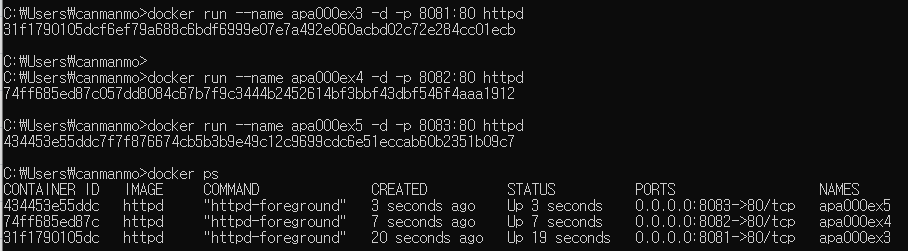

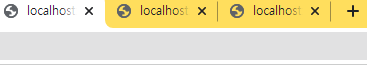

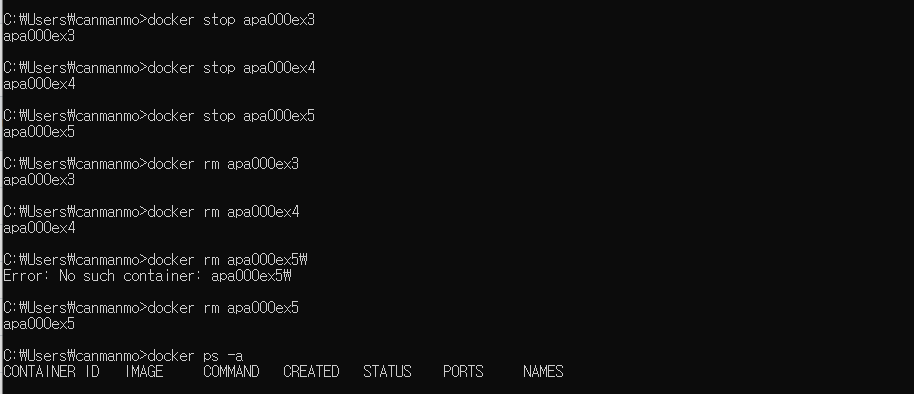